## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

mydata.info()

mydata.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5282 entries, 2000-01-03 to 2020-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      5282 non-null   float64
 1   F       5282 non-null   float64
 2   XOM     5282 non-null   float64
 3   LNC     5282 non-null   float64
 4   AAPL    5282 non-null   float64
dtypes: float64(5)
memory usage: 247.6 KB


,BP,F,XOM,LNC,AAPL
Date,,,,,
2000-01-03,22.004932,15.069453,20.892334,23.550459,0.862170
2000-01-04,21.888002,14.565937,20.492161,22.872194,0.789479
2000-01-05,22.636316,14.619884,21.609318,22.080902,0.801033
2000-01-06,22.683081,14.637873,22.726467,22.485029,0.731713
2000-01-07,22.262156,15.716831,22.659765,23.054750,0.766373


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

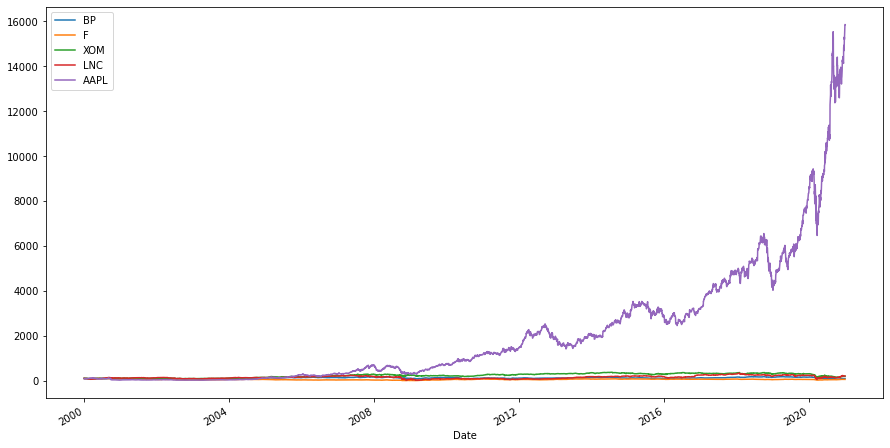

In [3]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,8));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [4]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

annual_returns = returns.mean() * 250

First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [5]:
weights = np.array([0.20,0.20,0.20,0.20,0.20])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [6]:
np.dot(annual_returns,weights)

0.1357853870122241

Transform the result into a percentage form. 

In [10]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio_1)


13.578999999999999%


Is the return of this portfolio satisfactory?